#Import the libraries

In [1]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt

#load the Data

In [9]:
df = pd.read_csv('/content/simulated_ab_test.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1000 non-null   int64 
 1   group      1000 non-null   object
 2   converted  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [11]:
df.head()

,user_id,group,converted
0,1,A,0
1,2,B,0
2,3,A,0
3,4,A,0
4,5,A,0


In [12]:
df.tail()

,user_id,group,converted
995,996,A,0
996,997,A,0
997,998,B,0
998,999,B,0
999,1000,A,0


# Separate groups

In [13]:
group_a = df[df['group'] == 'A']['converted']
group_b = df[df['group'] == 'B']['converted']

# 1. T-Test for proportions

In [14]:
t_stat, p_value = ttest_ind(group_a, group_b)

In [16]:
print(f"T-Statistic: {t_stat:.4f}")

T-Statistic: -2.0249


In [17]:
print(f"P-Value: {p_value:.4f}")

P-Value: 0.0431


# 2. Optional: Chi-Square Test

In [18]:
conversion_counts = pd.crosstab(df['group'], df['converted'])

In [19]:
conversion_counts

converted,0,1
group,,
A,427,63
B,421,89


In [20]:
chi2, chi_p, dof, expected = chi2_contingency(conversion_counts)

In [21]:
print(f"Chi2 Statistic: {chi2:.4f}")


Chi2 Statistic: 3.7428


In [22]:
print(f"P-Value: {chi_p:.4f}")

P-Value: 0.0530


# 3. Visualize

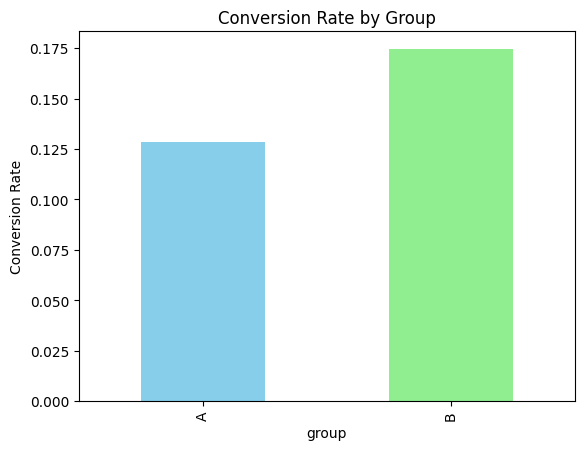

In [23]:
conversion_rates = df.groupby('group')['converted'].mean()
conversion_rates.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()

# 4. Final Decision

In [24]:
alpha = 0.05
if p_value < alpha:
    print("\n✅ Result: Statistically significant — Recommend launching the feature.")
else:
    print("\n❌ Result: Not statistically significant — Do NOT recommend launching yet.")


✅ Result: Statistically significant — Recommend launching the feature.
